## Task

● Write a (Python) program that  
○ reads in a network from an sif-file  
○ checks if all nodes are connected, and if not finds the giant component (=largest set of nodes
that are connected to each other)  
○ calculates the closeness centrality for each node in the giant component  
■ If you want more of a challenge, you can calculate the betweenness centrality instead

● You can check your results with cytoscape or NetworkX (https://networkx.org/)

● You can not use any of the functionalities of NetworkX, you have to write the
code on your own  
○ You can use “standard” Python libraries, but nothing related to networks. If in doubt, ask me.

● There are no points for style or efficiency etc, but your code needs to be able  
to calculate the chosen centrality for galFiltered.sif (see below) in a
reasonable time

#### Additional information
● Simple interaction format  
○ Different flavours, the examples I provide are written as  
Node1 pp Node2  
Node1 pp Node3  
Node2 pp Node4  
● pp stands for protein-protein, it doesn’t matter for this exercise  
● Each line in the sif file corresponds to an edge in the network, conversely  
there is one line for each edge

In [568]:
import os
import matplotlib as plt
import numpy as np
import networkx as nx
from random import choice

In [569]:
cwd = os.getcwd()

def read_file(filename, cwd = cwd):
    #returns edge list stored in file
    with open(cwd + "/02_testfiles/" + filename) as file:
        contents = []

        for line in file:
            line = line.strip().split(sep=" pp ")
            contents.append((line[0], line[1]))


    return contents



In [570]:
# def convert_node_names_to_nums(edge_list_names, node_list):
#     #make dictionary with key = node name, value = node number representation
#     edge_nums = []

#     for edge in edge_list_names:
#         source = node_list.index(edge[0])
#         destination = node_list.index(edge[1])
#         edge_nums.append((source, destination))
        
#     return edge_nums
        


In [571]:
def make_label_dict(node_list):
    label_dict = {}
    node_num = 0

    for node in node_list:
        label_dict[node] = node_num
        node_num += 1

    return label_dict

def convert_node_names_to_nums(edge_list_names, node_list):
    #make dictionary with key = node name, value = node number representation
    label_dict = make_label_dict(node_list)

    edge_nums = []

    for edge in edge_list_names:
        source = label_dict[edge[0]]
        destination = label_dict[edge[1]]
        edge_nums.append((source, destination))

    # for edge in edge_list_names:
    #     source = node_list.index(edge[0])
    #     destination = node_list.index(edge[1])
    #     edge_nums.append((source, destination))
        
    return edge_nums
        


In [572]:
def get_Node_list(edge_list):
    #returns a Node list from an edge_list
    node_list = []
    for edge in edge_list:
        for node in edge:
            if node not in node_list:
                node_list.append(node)

    node_list.sort()

    return node_list

In [573]:
def make_adjacency_matrix(edges, nodes):
    #initialize zero adjacency matrix:
    adj_matrix = [[0 for _ in range(len(nodes))] for _ in range(len(nodes))]

    #set connections to 1:
    for edge in edges:
        source = edge[0]
        destination = edge[1]

        adj_matrix[source][destination] = 1

        adj_matrix[destination][source] = 1

    return adj_matrix
    print(adj_matrix)

In [574]:
tfile_01_edges_names = read_file("example2.sif")
tfile_01_edges_names

[('S', 'T'),
 ('S', 'U'),
 ('S', 'V'),
 ('S', 'W'),
 ('V', 'W'),
 ('A', 'B'),
 ('A', 'C'),
 ('B', 'D'),
 ('B', 'E'),
 ('C', 'F'),
 ('D', 'H'),
 ('E', 'F'),
 ('F', 'G'),
 ('G', 'H'),
 ('I', 'J'),
 ('I', 'K'),
 ('J', 'K'),
 ('J', 'L')]

In [575]:
tfile_01_nodes = get_Node_list(tfile_01_edges_names)
tfile_01_nodes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'S',
 'T',
 'U',
 'V',
 'W']

In [576]:
tfile_01_edges = convert_node_names_to_nums(tfile_01_edges_names, tfile_01_nodes)
tfile_01_edges

[(12, 13),
 (12, 14),
 (12, 15),
 (12, 16),
 (15, 16),
 (0, 1),
 (0, 2),
 (1, 3),
 (1, 4),
 (2, 5),
 (3, 7),
 (4, 5),
 (5, 6),
 (6, 7),
 (8, 9),
 (8, 10),
 (9, 10),
 (9, 11)]

In [577]:
tfile_01_adjmat = make_adjacency_matrix(tfile_01_edges, tfile_01_nodes)
tfile_01_adjmat

[[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]]

In [578]:
def get_betweenness_centrality(M, i):
    #returns Betweenness centrality (BC) value of node i
    #Params: 
    # M = adjacency matrix
    # i = Node i (= Node of interest)
    pass

    #return BC

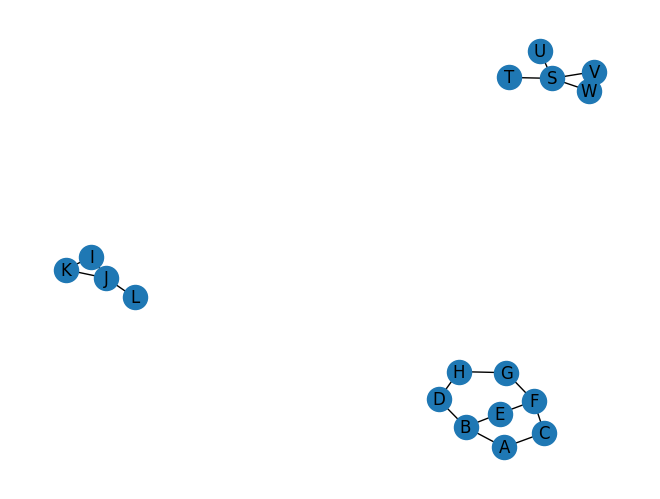

In [579]:
G = nx.from_edgelist(tfile_01_edges_names)
nx.draw(G, with_labels = True)


#np_matrix = np.asmatrix(tfile_01_adjmat)
#G3 = nx.from_numpy_array(np_matrix)
#nx.draw(G3)



In [668]:
def check_distance(edge_list, node_list, node_of_interest=False, return_connected_edge_list=False):
   #checks distance between two nodes, can be used to check for connectivity
   # Params:
   # edge_list = list of tuples containing node pairs (=edges)
   # node_list = sorted name list of nodes

   #make dictionary with node(label):distance,
   #additionally make a list of tuples containing all connected edges
   distance = 0
   distance_dict = {}

   #select random starting node if no node of interest is specified:
   if node_of_interest == False:
      distance_dict[choice(node_list)] = distance
   else:
      distance_dict[node_of_interest] = distance

      
   connected_edge_list = []

   condition = True

   found_node = True

   while condition:
      if found_node == False: #len(distance_dict) >= len(node_list):
         condition = False
      found_node = False


      distance += 1

      recent_nodes = [k for k,v in distance_dict.items() if v == distance - 1]

      for node in recent_nodes:
         for edge in edge_list:
            if node in edge:
               found_node = True
               #add to connected_edge_list
               if edge not in connected_edge_list:
                  connected_edge_list.append(edge)
               #iterate over edges nodes to get other
               for inner_node in edge:
                  if inner_node != node and inner_node not in distance_dict:
                     distance_dict[inner_node] = distance


   if return_connected_edge_list == True:
      return distance_dict, connected_edge_list
   else:
      return distance_dict

In [ ]:
def identify_components(edge_list, node_list):
   #checks all connected networks in graph.
   # Params:
   # edge_list = list of tuples containing node pairs (=edges)
   # node_list = sorted name list of nodes


   checked_nodes = []
   #contains edge_list of found components
   found_components = []
   

   #make dictionary with node(label):distance,
   #additionally make a list of tuples containing all connected edges


   #run as long as not all nodes are checked:
   while len(checked_nodes) < len(node_list):
      add_component = True
      distance = 0
      distance_dict = {}

      #select random starting node out of the not-yet checked nodes:
      distance_dict[choice(list(set(node_list)-set(checked_nodes)))] = distance
   
      connected_edge_list = []


      found_node = True
      while add_component:
        
         if found_node == False: #len(distance_dict) >= len(node_list):
            add_component = False
         found_node = False
         distance += 1

         recent_nodes = [k for k,v in distance_dict.items() if v == distance - 1]

         for node in recent_nodes:
            checked_nodes.append(node)
            for edge in edge_list:
               if node in edge:
                  found_node = True
                  #add to connected_edge_list
                  if edge not in connected_edge_list:
                     connected_edge_list.append(edge)
                  #iterate over edges nodes to get other
                  for inner_node in edge:
                     if inner_node != node and inner_node not in distance_dict:
                        distance_dict[inner_node] = distance

      found_components.append(connected_edge_list)
         

   return found_components

## Check Connectivity
If graph is connected, amount of numbered (=connected) nodes = total number of nodes.  
Or, in this implementation, number of lists in components_edge_list == 1 

In [673]:
#get distances for random node:
distances = check_distance(tfile_01_edges_names, tfile_01_nodes)
print(len(distances) == len(tfile_01_nodes))
print(distances)

False
{'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 2, 'H': 3, 'G': 3}


In [674]:
components_edge_list = identify_components(tfile_01_edges_names, tfile_01_nodes) 

for i in components_edge_list:
    print(i)


print("\n\nLength of 'components_edge_list':")
len(components_edge_list)

[('A', 'C'), ('C', 'F'), ('A', 'B'), ('E', 'F'), ('F', 'G'), ('B', 'D'), ('B', 'E'), ('G', 'H'), ('D', 'H')]
[('S', 'W'), ('V', 'W'), ('S', 'T'), ('S', 'U'), ('S', 'V')]
[('I', 'J'), ('I', 'K'), ('J', 'K'), ('J', 'L')]


Length of 'components_edge_list':


3

### Find largest component
Chose random node, check connectivity.
If size < N/2, not the largest component.
Chose random node, not in first search, and check distances (respectively length of corresponding dictionary) again.

In [725]:
# def get_largest_component(edge_list, node_list):

#     checked_nodes = []
#     unchecked_nodes = node_list

#     found_components = []

#     while len(checked_nodes) <= len(node_list)/2:
#         remaining_nodes = list(set(unchecked_nodes)-set(checked_nodes))
#         starting_node = choice(remaining_nodes)

#         distance_dict, connected_edge_list = check_distance(edge_list, node_list, return_connected_edge_list=True)

#         #add all connected
#         for node in distance_dict.keys():
#             checked_nodes.append(node)

#         found_components.append(distance_dict)

#     #find largest component (= longest dict) in found_components

#     largest_component = found_components[0]
#     for d in found_components:
#         if len(d) > len(largest_component):
#             largest_component = d

#     return largest_component


def get_largest_component(components_edge_list):
    # components_node_list = []
    # for comp in components_edge_list:
    #     components_node_list.append(get_Node_list(comp))
    # lc_nodes = components_node_list[0]
    # lc_index = 0

    # lc = []
    # for i, comp in enumerate(components_node_list):
    #     if len(comp) >= len(lc_nodes):
    #         lc_nodes = comp
    #         lc = components_edge_list[i]

    lc = components_edge_list[0]
    for c in components_edge_list:
        if len(get_Node_list(c)) > len(get_Node_list(lc)):
            lc = c

    return lc
    #TODO: implement solution
    #return [('A', 'C'), ('C', 'F'), ('A', 'B'), ('E', 'F'), ('F', 'G'), ('B', 'D'), ('B', 'E'), ('G', 'H'), ('D', 'H')]


In [726]:
#largest_component = get_largest_component(tfile_01_edges_names, tfile_01_nodes)
largest_component = get_largest_component(components_edge_list)
largest_component

[('A', 'C'),
 ('C', 'F'),
 ('A', 'B'),
 ('E', 'F'),
 ('F', 'G'),
 ('B', 'D'),
 ('B', 'E'),
 ('G', 'H'),
 ('D', 'H')]

### Calculate Closeness Centrality
for each node in largest component

In [723]:
def distance_node(node_list, edge_list):
    #node_list = list of nodes
    #edge_list = corresponding list of edges of the node_list
    pass
    

def get_closeness_centrality(edge_list, node_list, node):
    #returns closeness centrality (CC) value of node i
    #Params: 
    # node = name/num of node of interest
    # edge_list = edge list of connected graph/component
    # node_list = list of nodes in edge_list

    # N = total number of nodes
    # M = adjacency matrix
    # i = Node i (= Node of interest)

    N = len(node_list)

    distances_dict = check_distance(edge_list, node_list, node)

    distances = [v for v in distances_dict.values()]

    Ci = (N - 1) / sum(distances)

    return round(Ci, 3)


In [724]:

#closeness centrality for largest component (lc)
CC_lc = {}
node_list_lc = get_Node_list(largest_component) #[n for n in largest_component]#[k for k in largest_component.keys()]

for node in node_list_lc: #largest_component.keys():
    CC_lc[node] = get_closeness_centrality(largest_component, node_list_lc, node)


print(CC_lc)
#get_closeness_centrality("A", tfile_01_edges_names, tfile_01_nodes)

{'A': 0.5, 'B': 0.583, 'C': 0.5, 'D': 0.5, 'E': 0.538, 'F': 0.583, 'G': 0.5, 'H': 0.467}
